# Distortion and polarization state

In [1]:
import numpy as np
import pyfits
import matplotlib.pyplot as plt
import skimage
from skimage.feature import blob_dog, blob_doh, blob_log, canny
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.segmentation import slic
from skimage.filters import sobel
from scipy.signal import convolve2d
from skimage import measure
from scipy.optimize import curve_fit
import matplotlib.ticker as mtick
from scipy.ndimage.filters import gaussian_filter as gf
from skimage import measure
from skimage.measure import label
from skimage.measure import regionprops


In [2]:
path = '/home/fatima/Desktop/solar_orbiter_project/codes/targets/'

In [3]:
data = pyfits.getdata(path+'solo_L0_0000015224_20170411T152003.fits')

In [4]:
data.shape

(4, 2048, 2048)

In [5]:
I = data[0,:,:]
Q = data[1,:,:]
U = data[2,:,:]
V = data[3,:,:]

In [9]:
print I.mean()
print Q.mean()
print U.mean()
print V.mean()
I = I/I.mean()
V = V/V.mean()

17233214.4702
17203309.6603
17238599.3508
17231657.4413


In [12]:
(I/V).mean()

0.99983817627259575

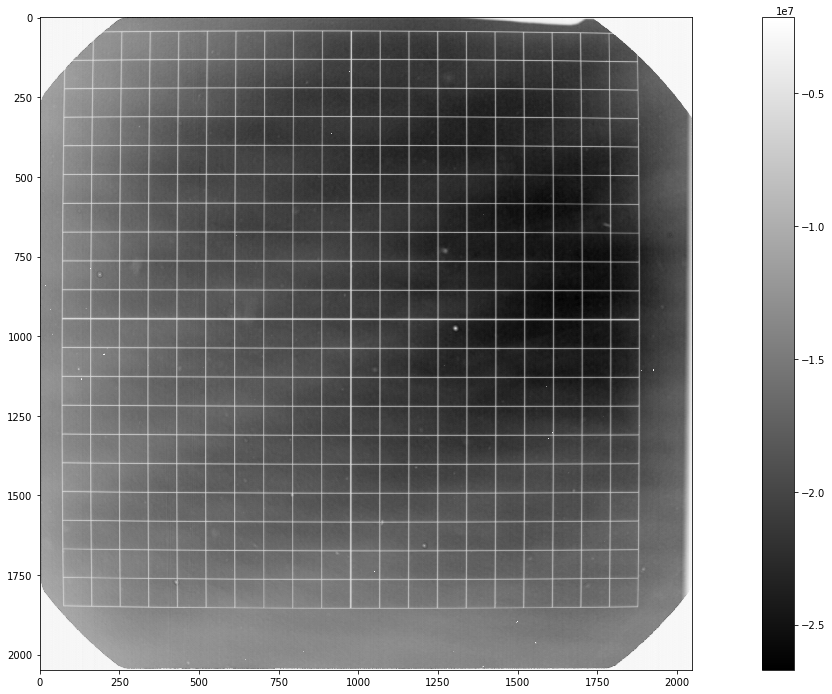

In [10]:
fig=plt.figure(figsize=(25,12))
plt.imshow(I-Q,cmap='gray')
plt.colorbar()

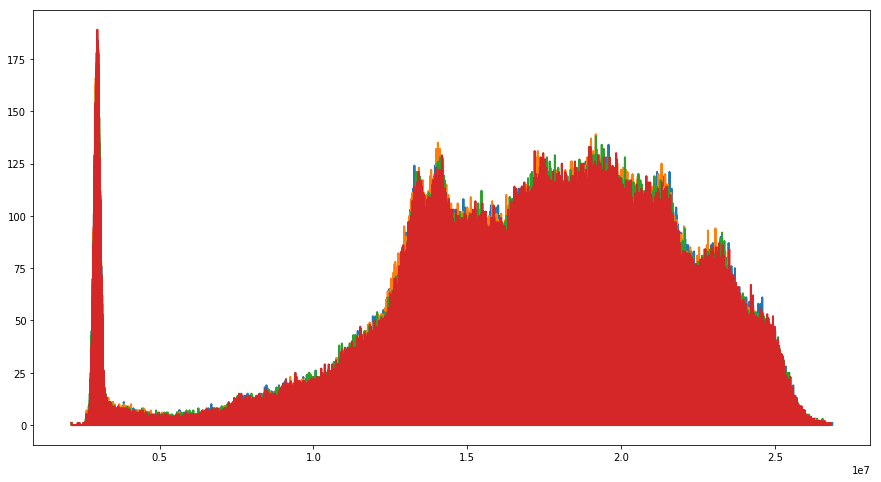

In [27]:
plt.clf()
from skimage.exposure import histogram
hist_I, hist_centers_I= histogram(I)
hist_Q, hist_centers_Q= histogram(Q)

hist_U, hist_centers_U= histogram(U)
hist_V, hist_centers_V= histogram(V)


fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(hist_centers_I, hist_I, lw=2)
ax.plot(hist_centers_Q, hist_Q, lw=2)
ax.plot(hist_centers_U, hist_U, lw=2)
ax.plot(hist_centers_V, hist_V, lw=2)

In [36]:
import seaborn as sns
I = np.ravel(I)
Q = np.ravel(Q)
U = np.ravel(U)
V = np.ravel(V)

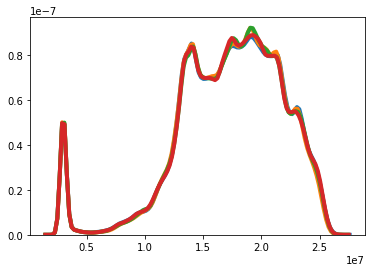

In [38]:
for array in [I,Q,U,V]:
 sns.distplot(array, hist=False, kde=True,
             kde_kws={'linewidth': 4})
plt.show()


In [6]:
'''
centers = np.zeros((4,29,2))
for n in range(4):
    d = data[n,:,:]
    d = d/d.mean()
    mask = np.zeros((2048,2048))
    for i in range(2048):
      for j in range(2048):
         if d[i][j] < 0.6:
            mask[i][j] = 1
         else:
            mask[i][j] = 0
    mask_smooth = gf(mask,sigma=5,mode='nearest')
    
    mask_2 = np.zeros((2048,2048))
    for i in range(2048):
         for j in range(2048):
             if mask_smooth[i][j] > 0.6:

                   mask_2[i][j] = 1
             else:
                   mask_2[i][j] = 0
    labels, numb = measure.label(mask_2,background=0, return_num=True)
    props = skimage.measure.regionprops(labels)
    centers[n] = np.array([prop.centroid for prop in props])
    F = open(path+'Centers_python_circles_'+str(n),'w')
    for i in range(numb):
     F.write(str(centers[n][i][1]) + ' '+ str(centers[n][i][0])+'\n')
    F.close()
'''   

"\ncenters = np.zeros((4,29,2))\nfor n in range(4):\n    d = data[n,:,:]\n    d = d/d.mean()\n    mask = np.zeros((2048,2048))\n    for i in range(2048):\n      for j in range(2048):\n         if d[i][j] < 0.6:\n            mask[i][j] = 1\n         else:\n            mask[i][j] = 0\n    mask_smooth = gf(mask,sigma=5,mode='nearest')\n    \n    mask_2 = np.zeros((2048,2048))\n    for i in range(2048):\n         for j in range(2048):\n             if mask_smooth[i][j] > 0.6:\n\n                   mask_2[i][j] = 1\n             else:\n                   mask_2[i][j] = 0\n    labels, numb = measure.label(mask_2,background=0, return_num=True)\n    props = skimage.measure.regionprops(labels)\n    centers[n] = np.array([prop.centroid for prop in props])\n    F = open(path+'Centers_python_circles_'+str(n),'w')\n    for i in range(numb):\n     F.write(str(centers[n][i][1]) + ' '+ str(centers[n][i][0])+'\n')\n    F.close()\n"

In [7]:
grid = V

In [8]:
edge = sobel(grid)

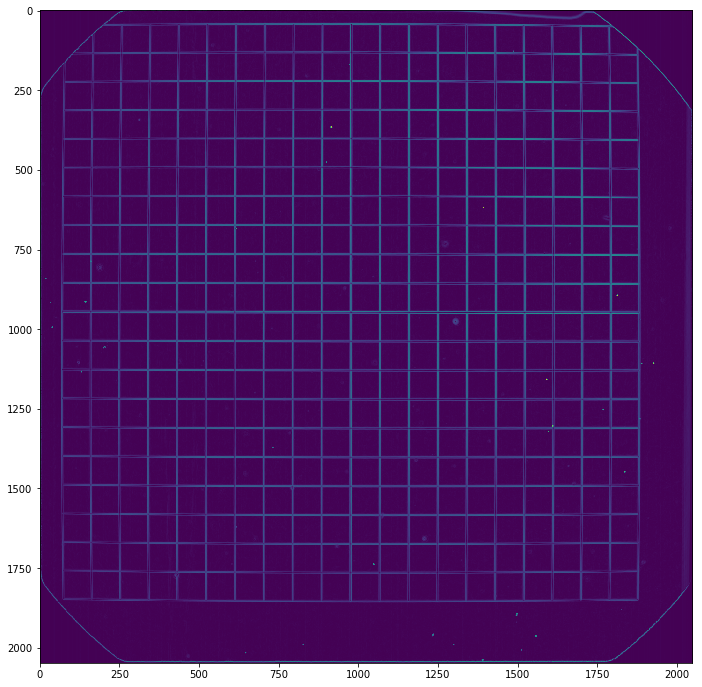

In [9]:
fig=plt.figure(figsize=(25,12))
plt.imshow(edge)


In [10]:
edges = edge/edge.mean()

In [11]:
mask = np.zeros((edge.shape[1],edge.shape[0]))
for i in range(edge.shape[1]):
    for j in range(edge.shape[0]):
        if edges[i][j] > 3:
            mask[i][j] = 1
        else:
            mask[i][j] = 0



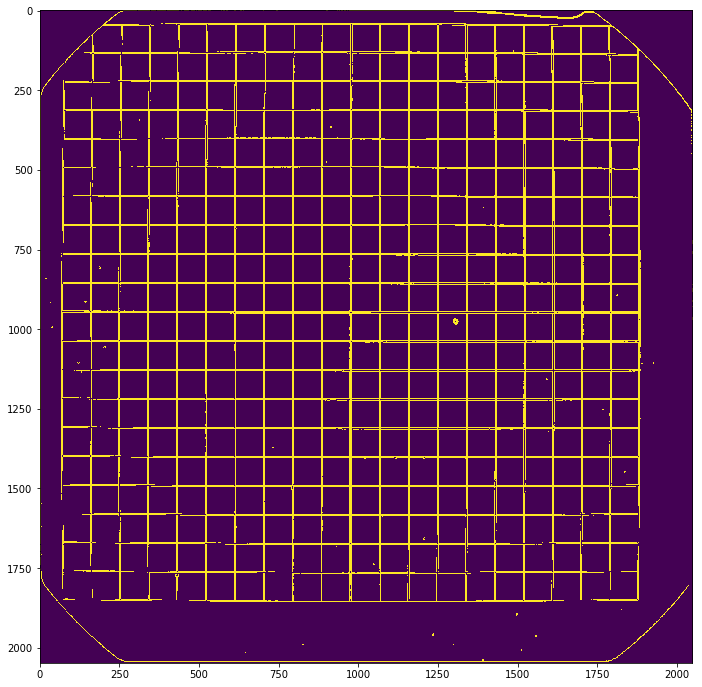

In [12]:
fig=plt.figure(figsize=(25,12))
plt.imshow(mask)

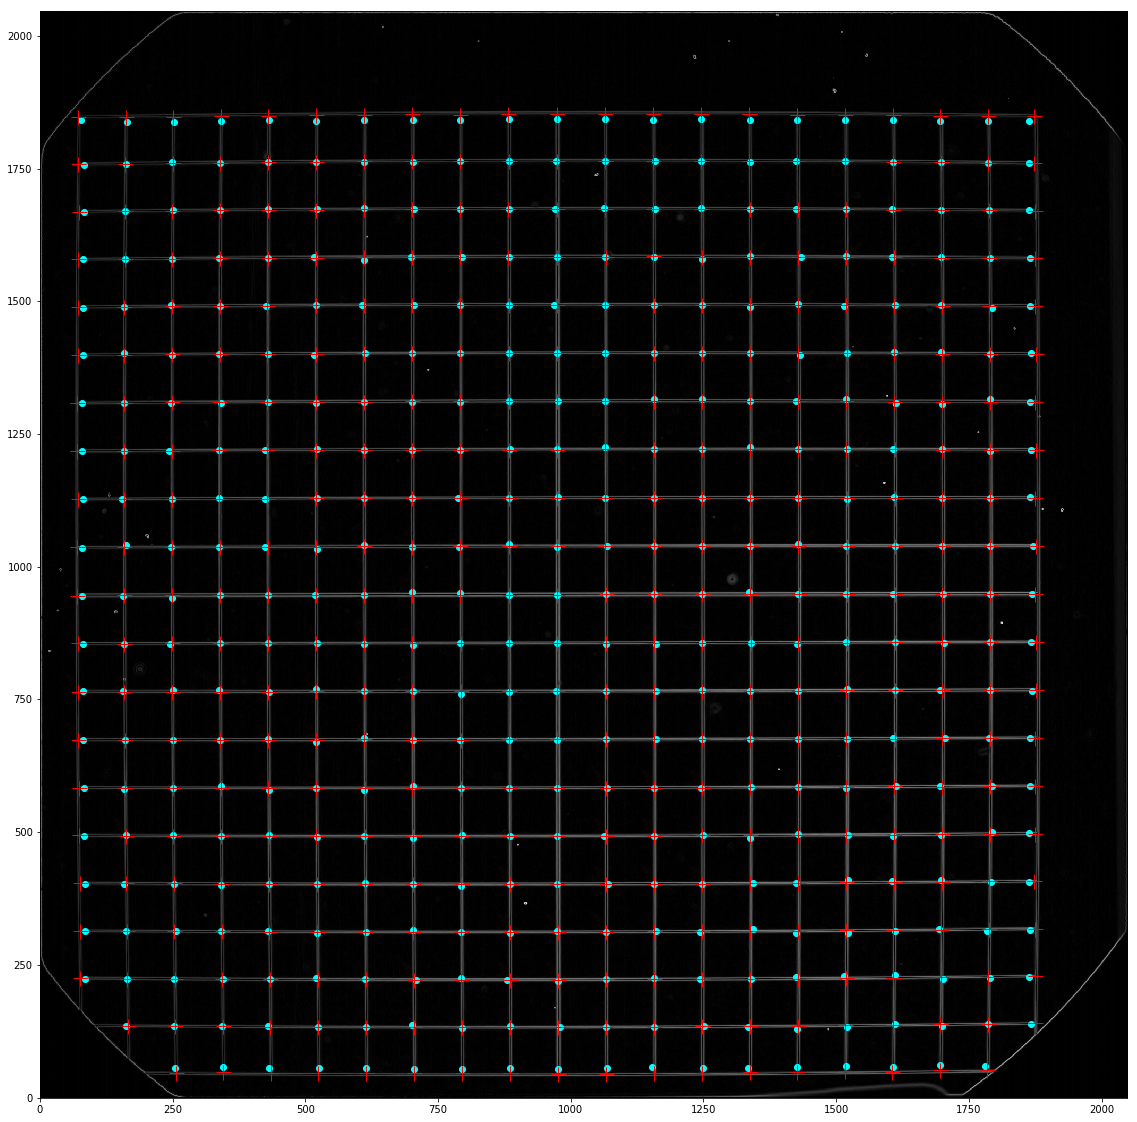

In [13]:
response = corner_harris(mask, k=0.1,sigma=20)
coords = corner_peaks(response)#, num_peaks=3000)
coords_subpix = corner_subpix(mask, coords, window_size=25, alpha=0.9)

figure = plt.figure(figsize=(20,20))
ax = figure.add_subplot(111)
ax.imshow(edges, cmap='gray', origin='bottom')
ax.plot(coords[:,1], coords[:,0],color='cyan', marker='o',linestyle='None', markersize=6)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)



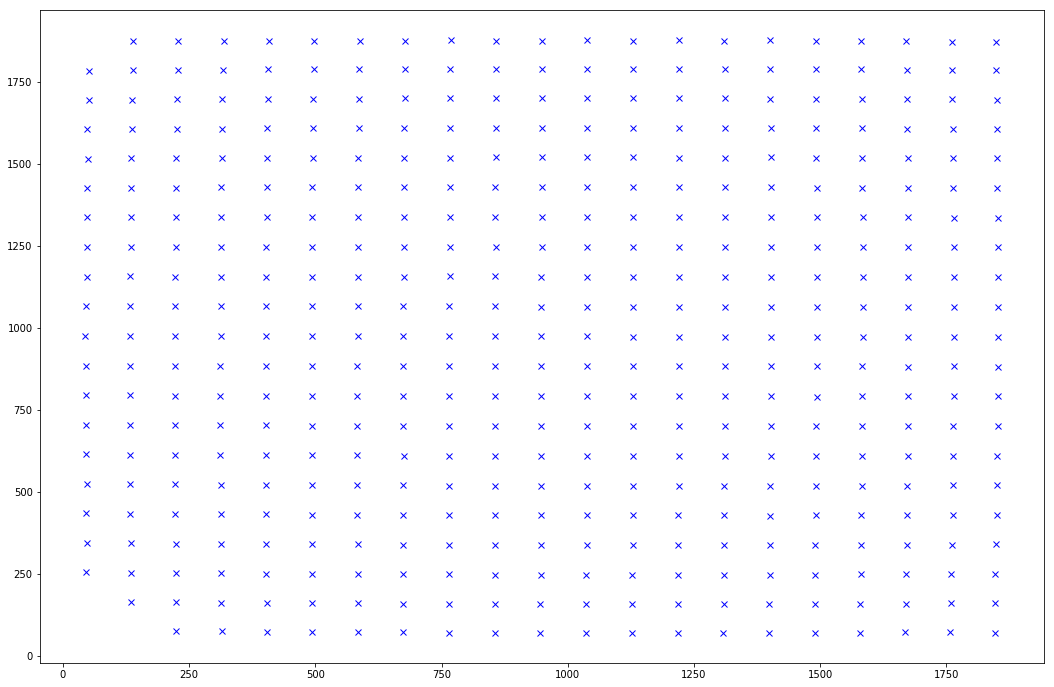

In [14]:
y = coords[:,0]
x = coords[:,1]
x_sub = coords_subpix[:,0]
y_sub = coords_subpix[:,1]
fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)
#plt.plot(x,y,'rx')
ax1.plot(x_sub, y_sub,'bx')
plt.show()

In [15]:
'''
F = open('coordinates_grid_impro_Q','w')
for i in range(len(x)):
    F.write(str(x_sub[i])+' '+str(y_sub[i])+'\n')
F.close()
'''

"\nF = open('coordinates_grid_impro_Q','w')\nfor i in range(len(x)):\n    F.write(str(x_sub[i])+' '+str(y_sub[i])+'\n')\nF.close()\n"

In [16]:
x = coords_subpix[:,1]
y = coords_subpix[:,0]

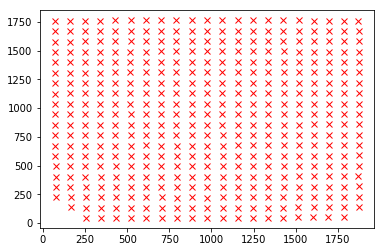

In [17]:
LINES = []

for n in range(20):
    temp = []
    for m in range(len(coords_subpix[:,0])):
        if (y[m] > 92*n) & (y[m]<92*(n+1)):
              temp.append([x[m], y[m]])
    temp = np.array(temp)
    LINES.append(temp)
   
for i in range(20):
    X = LINES[i][:,0]
    Y = LINES[i][:,1]
    plt.plot(X,Y,'rx')
    
plt.show()



In [18]:
LINES = np.delete(LINES,[0])

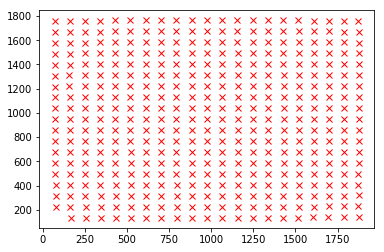

In [19]:
for i in range(19):
    X = LINES[i][:,0]
    Y = LINES[i][:,1]
    plt.plot(X,Y,'rx')
    
plt.show()


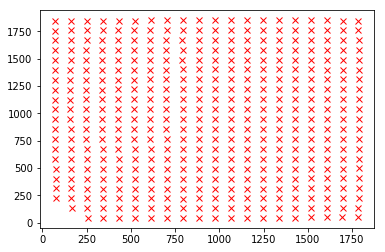

In [20]:
#print np.sort(x)
COLUMNS = []

for n in range(20):
    temp = []
    for m in range(len(coords_subpix[:,0])):
        if (x[m] >90*n) & (x[m]<90*(n+1)):
              temp.append([x[m], y[m]])
    temp = np.array(temp)
    COLUMNS.append(temp)
    
for i in range(20):
    X = COLUMNS[i][:,0]
    Y = COLUMNS[i][:,1]
    #print COLUMNS[i].shape
    plt.plot(X,Y,'rx')
    
plt.show()




In [21]:
COLUMNS = np.delete(COLUMNS,[0])

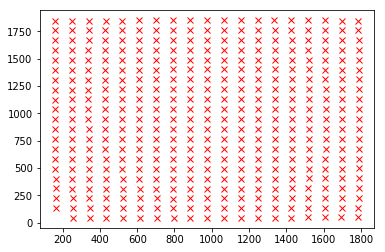

In [22]:
for i in range(19):
    X = COLUMNS[i][:,0]
    Y = COLUMNS[i][:,1]
    #print COLUMNS[i].shape
    plt.plot(X,Y,'rx')
    
plt.show()



1023.5

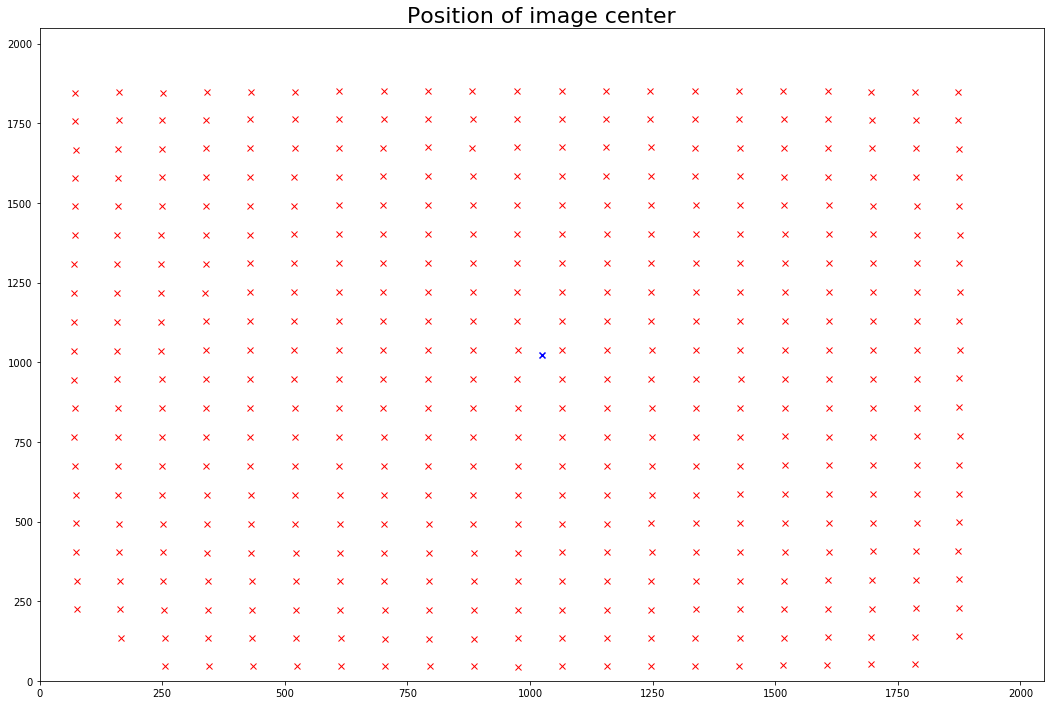

In [23]:
fig = plt.figure(figsize=(18,12))

Ny, Nx = grid.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xc = center[1]
yc = center[0]
plt.scatter(xc,yc,marker='x',color='b')
plt.plot(coords_subpix[:,1], coords_subpix[:,0],'rx')
plt.xlim(0,2048)
plt.ylim(0,2048)
plt.title('Position of image center',fontsize=22)
Nx
Ny
xc

In [24]:
def parabola_lines(x,a,b,c):
    y = a*x**2 + b*x + c
    return y
def parabola_columns(y,m,n,p):
    x = m*y**2 + n*y + p
    return x


(20,) (20,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)
(21,) (21,)


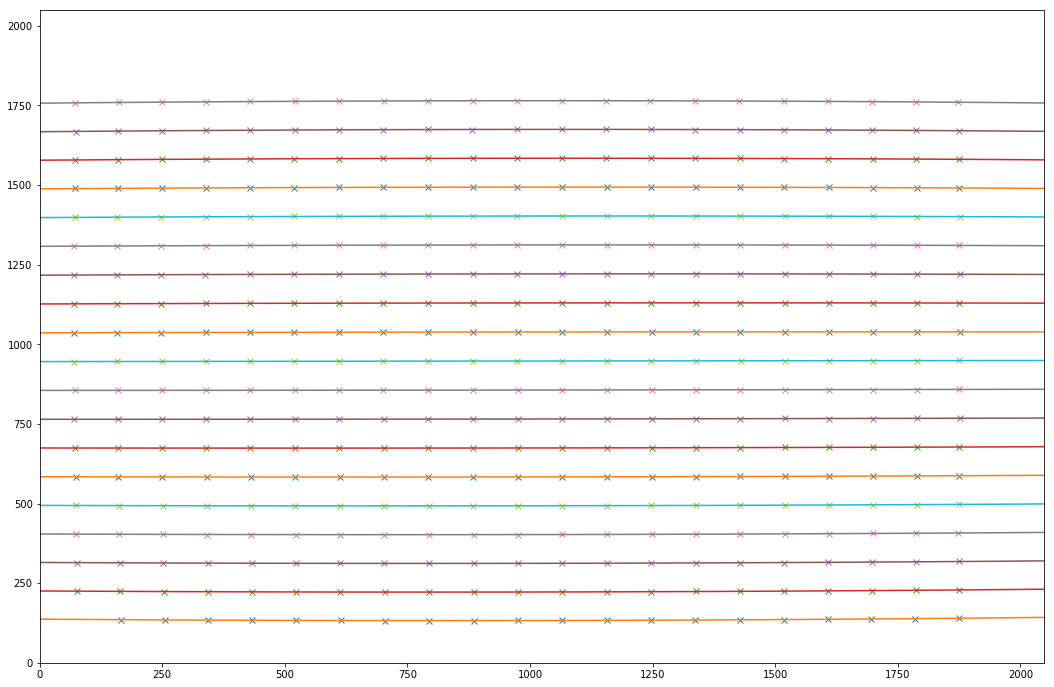

In [25]:
plt.clf()
fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
n=0
A = np.zeros(len(LINES))
B = np.zeros(len(LINES))
C = np.zeros(len(LINES))
for i in range(len(LINES)):
    x = LINES[i][:,0]; y = LINES[i][:,1]
    print x.shape, y.shape
    temp1 = np.array([[x[0]**2,x[1]**2,x[2]**2], [x[0],x[1],x[2]],[1,1,1]])
    temp2 = np.array([y[0], y[1],y[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_lines,x,y,p0,maxfev=5000)
    A[n] = popt[0]; B[n] = popt[1]; C[n] = popt[2]
    xnew = np.linspace(0, 2048, 100)
    ynew = parabola_lines(xnew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    
    n=n+1

#plt.legend(loc='best')
plt.show()

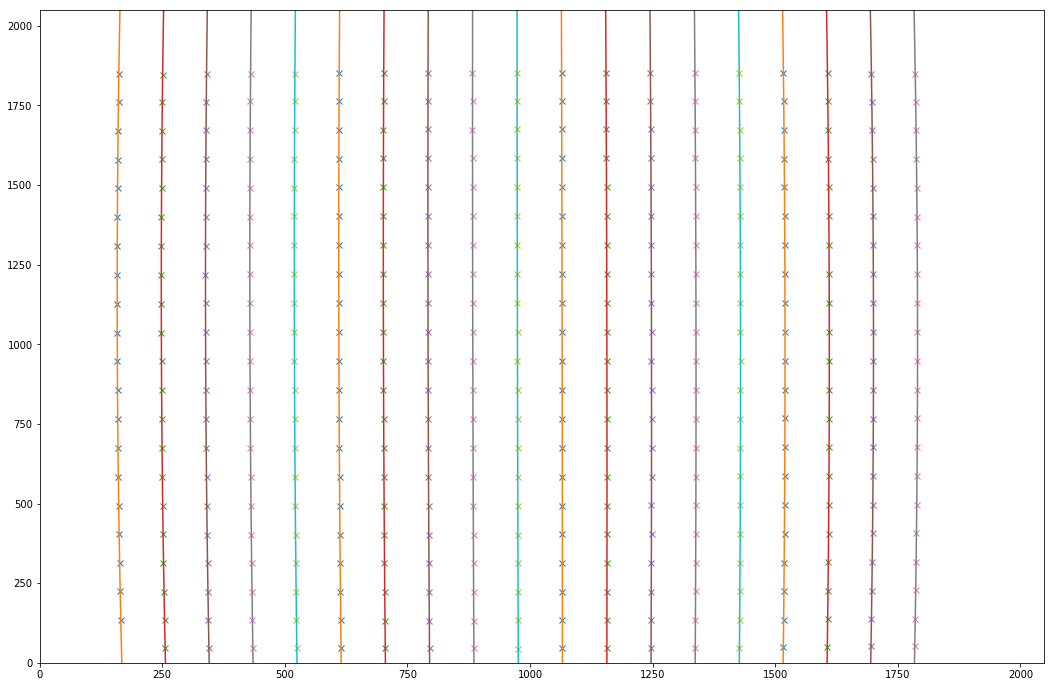

In [26]:
plt.clf()
fig=plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
n=0
M = np.zeros(len(COLUMNS))
N =  np.zeros(len(COLUMNS))
P =  np.zeros(len(COLUMNS))

for i in range(len(COLUMNS)):
    x = COLUMNS[i][:,0]; y = COLUMNS[i][:,1]
    temp1 = np.array([[y[0]**2,y[1]**2,y[1]**2], [y[0],y[1],y[2]],[1,1,1]])
    temp2 = np.array([x[0], x[1],x[2]])
    p0 = np.linalg.solve(temp1,temp2)
    popt, pcov = curve_fit(parabola_columns, y,x,p0)
    M[n]=popt[0]; N[n] = popt[1]; P[n] = popt[2]
    ynew = np.linspace(0, 2048, 100)
    xnew = parabola_columns(ynew, *popt)
    ax.plot(x,y,'x')
    ax.plot(xnew, ynew,label=str(n))
    ax.set_xlim(0,2048)
    ax.set_ylim(0,2048)
    n=n+1

#plt.legend()
plt.show()


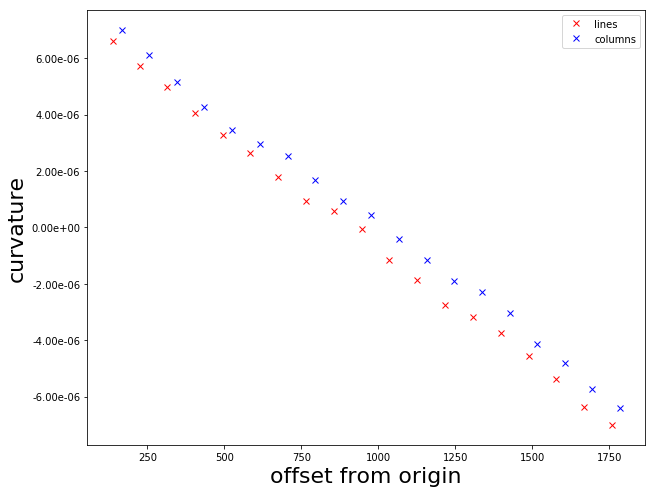

In [27]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C,A,'rx',label='lines')
ax.plot(P,M,'bx',label='columns')
ax.set_xlabel('offset from origin',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
#ax.set_xlim(P.min(), P.max())
#ax.set_ylim(A.min(), A.max())
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

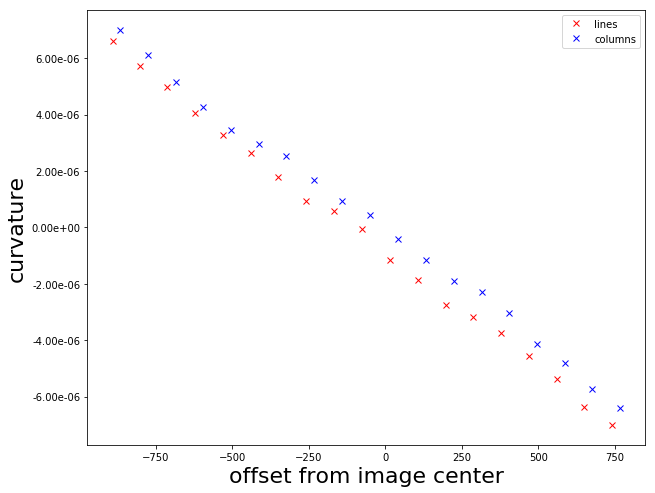

In [28]:
C_2 = A*xc**2 + B*xc + C - yc
P_2 = M*yc**2 + N*yc + P - xc
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C_2,A,'rx',label='lines')
ax.plot(P_2,M,'bx',label='columns')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')

3.20826213222e-10 1.88721301895e-11
2.98069830284e-10 1.75335194285e-11


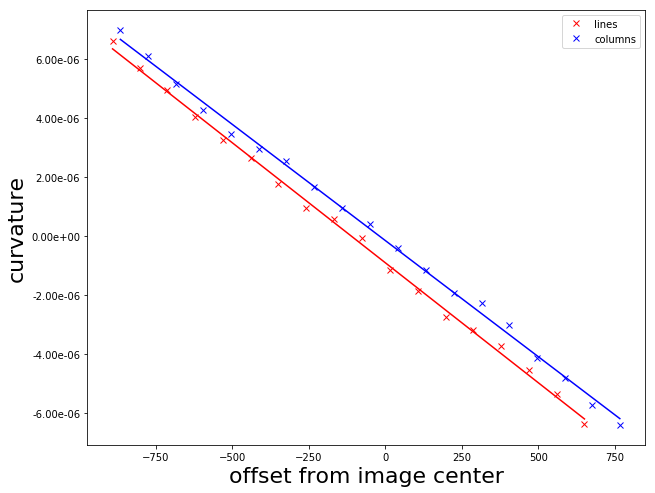

In [29]:
t = np.polyfit(C_2[:-1], A[:-1], 1)
tnew = np.linspace(C_2[:-1].min(),C_2[:-1].max(),100)
model = np.poly1d(t)
Tnew = model(tnew)
## GOODNESS OF FIT
chi_sq_w_lines = np.sum((model(A)-A)**2)
red_chi_sq_lines = chi_sq_w_lines/(len(A)-len(t))
print chi_sq_w_lines,red_chi_sq_lines




t2 = np.polyfit(np.delete(P_2,[1]),np.delete(M,[1]) , 1)
tnew2 = np.linspace(P_2.min(),P_2.max(),100)
model2 = np.poly1d(t2)
Tnew2 = model2(tnew2)
## goodness of fit
chi_sq_w_cols = np.sum((model2(M)-M)**2)
red_chi_sq_cols = chi_sq_w_cols/(len(M)-len(t2))
print chi_sq_w_cols ,red_chi_sq_cols

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(C_2[:-1],A[:-1],'rx',label='lines')
ax.plot(tnew,Tnew,'r')
ax.plot(P_2,M,'bx',label='columns')
ax.plot(tnew2, Tnew2, 'b')
ax.set_xlabel('offset from image center',fontsize=22)
ax.set_ylabel('curvature',fontsize=22)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend(loc='best')


In [30]:
## Finding distortion center:

del_lines = -t[1]/t[0]
del_columns = -t2[1]/t2[0]
y_d = del_lines+yc
x_d = del_columns + xc
print 'the distortion center is:', (x_d,y_d)
del_lines, del_columns

the distortion center is: (1005.1209836199776, 913.15088208254429)


(-110.34911791745573, -18.379016380022431)

In [31]:
Ny, Nx = grid.shape
i,j = np.indices([Ny,Nx])
center = np.array([(i.max()-i.min())/2.0, (j.max()-j.min())/2.0])
xd = center[1]
yd = center[0]
C_2 = A*xc**2 + B*xc + C - yd #lines
P_2 = M*yc**2 + N*yc + P - xd #columns
trials = 10
i=0
temp_x = temp_y = np.zeros((10))


In [32]:
for n in range(trials):
    
    t = np.polyfit(C_2, A, 1)
    t2 = np.polyfit(P_2, M, 1)
    
    del_lines = -t[1]/t[0]
    del_columns = -t2[1]/t2[0]
    yd = del_lines+yd
    xd = del_columns + xd
    print 'the distortion center is:', (xd,yd)
    print del_lines, del_columns
   
    C_2 = A*x_d**2 + B*x_d + C - yd#lines
    P_2 = M*y_d**2 + N*y_d + P - xd #columns
    temp_x[i] = xd
    temp_y[i] = yd
    i=i+1

the distortion center is: (1005.9831300654716, 912.77367929417937)
-110.726320706 -17.5168699345
the distortion center is: (1006.1105459078643, 912.74410050013671)
-0.0295787940427 0.127415842393
the distortion center is: (1006.1105459078644, 912.74410050013682)
1.2895030015e-13 1.59460017113e-13
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 -4.29074546819e-14
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 -4.29074546819e-14
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 -4.29074546819e-14
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 -4.29074546819e-14
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 -4.29074546819e-14
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 -4.29074546819e-14
the distortion center is: (1006.1105459078644, 912.74410050013682)
4.8652748238e-14 

In [33]:
x_d = xd
y_d = yd

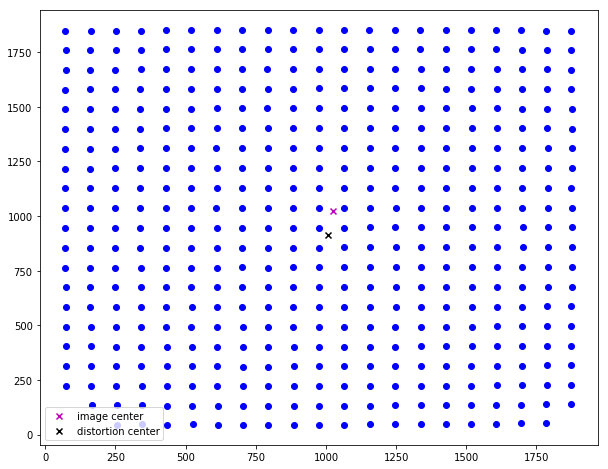

In [34]:
plt.clf()
fig = plt.figure(figsize=(10,8))
plt.scatter(xc,yc,marker='x', color='m',label='image center')
plt.scatter(x_d,y_d,marker='x',color='k',label='distortion center')
#plt.plot(lines[:,0], lines[:,1],'rx')
plt.plot(coords_subpix[:,1], coords_subpix[:,0],'bo')
plt.legend(loc='best')


In [35]:
## parabola coefficient in the new reference of distortion center
C_3 = A*x_d**2 + B*x_d + C - y_d
P_3 = M*y_d**2 + N*y_d + P - x_d
B_3 = 2*A*x_d + B
N_3 = 2*M*y_d + N



In [36]:
## slope of curvature versus offset in the lines
s_x = t[0]

## slope of curvature versus offset in columns
s_y = t2[0]

## aspect ratio
AR = np.sqrt(np.abs(s_x/s_y))
print AR



1.01551676791


In [37]:
## correcting the coefficients:
M_4 = M/AR
N_4 = N_3/AR
P_4 = P_3/AR

A_4 = A*AR**2
B_4 = B_3*AR
C_4 = C_3

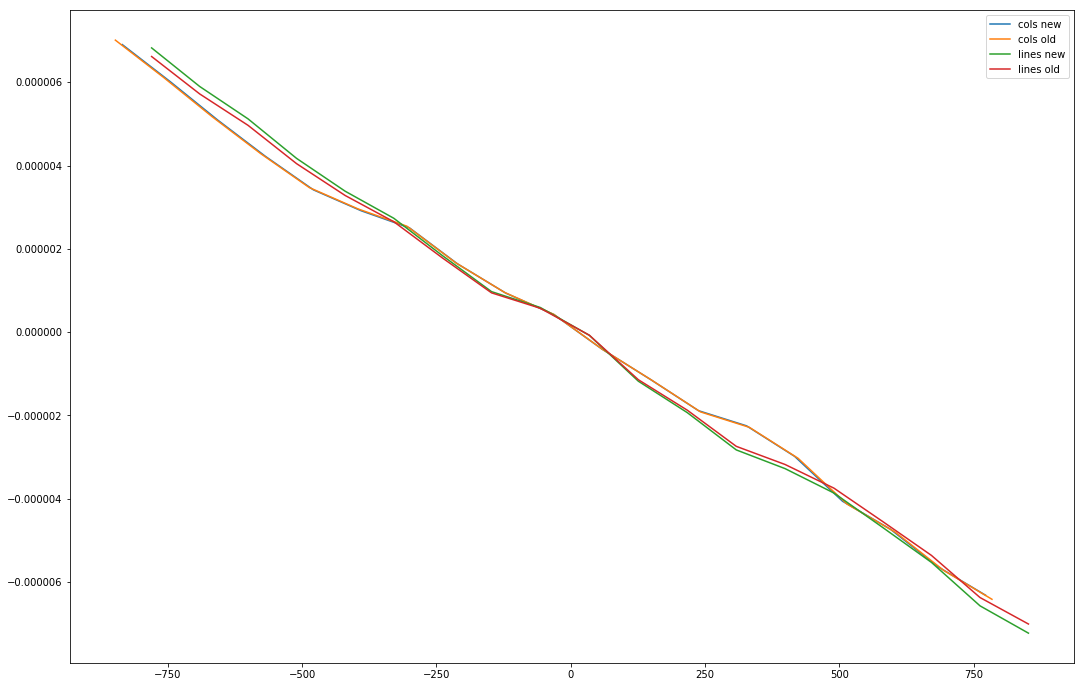

In [38]:
plt.figure(figsize=(18,12))
plt.plot(P_4,M_4,label='cols new')
plt.plot(P_3,M,label='cols old')
plt.plot(C_4,A_4,label='lines new')
plt.plot(C_3,A,label='lines old')
plt.legend()

plt.show()


[  8.61878980e-09   8.38314742e-09   8.34434463e-09   7.98026901e-09
   7.85053031e-09   8.07569846e-09   7.47236128e-09   6.40923337e-09
   1.01672350e-08   2.11233228e-09   9.07042550e-09   8.64253729e-09
   8.91744401e-09   7.99173366e-09   7.68592340e-09   7.89208643e-09
   8.07006464e-09   8.48716980e-09   8.37496820e-09]
7.92348918281e-09
8.30225989832e-09


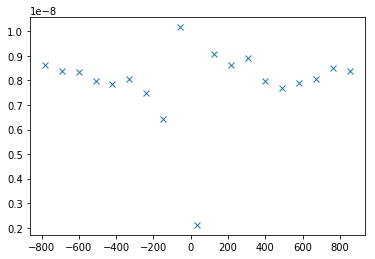

In [39]:
k_lines = (-A)/(C_3*(3*A*C_3 + 3*B_3**2 + 1))
plt.plot(C_3, k_lines,'x')
print k_lines
print k_lines.mean()
print np.average(k_lines,weights=C_3)

[  8.89270576e-09   8.64856238e-09   8.60773393e-09   8.23144665e-09
   8.09709758e-09   8.32894065e-09   7.70635837e-09   6.60976173e-09
   1.04852371e-08   2.17839394e-09   9.35422121e-09   8.91316581e-09
   9.19706041e-09   8.24265305e-09   7.92766668e-09   8.14093858e-09
   8.32529107e-09   8.75664671e-09   8.64181771e-09]
8.17293154397e-09
8.56651298686e-09


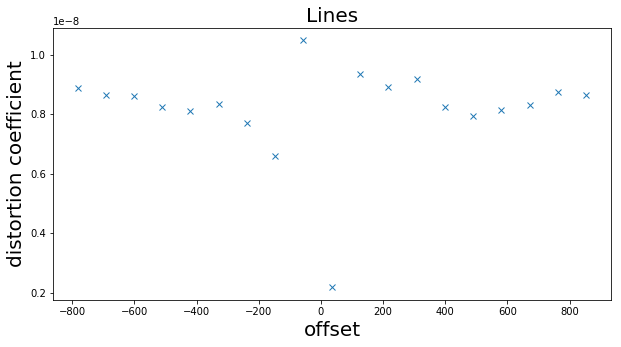

In [40]:
k_lines_4 = (-A_4)/(C_4*(3*A_4*C_4 + 3*B_4**2 + 1))
plt.figure(figsize=(10,5))
plt.plot(C_4, k_lines_4,'x')
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Lines',fontsize=20)
print k_lines_4
print k_lines_4.mean()
print np.average(k_lines_4,weights=C_4)

[  8.42378157e-09   8.18551745e-09   7.83413579e-09   7.48591796e-09
   7.17259866e-09   7.50331857e-09   8.36612831e-09   7.79374568e-09
   7.76450421e-09   1.35707665e-08   6.98861494e-09   7.64879213e-09
   7.93399066e-09   6.88652096e-09   7.18210651e-09   8.07502980e-09
   8.02023984e-09   8.33891382e-09   8.30523859e-09]
8.07788747187e-09
8.04669270993e-09


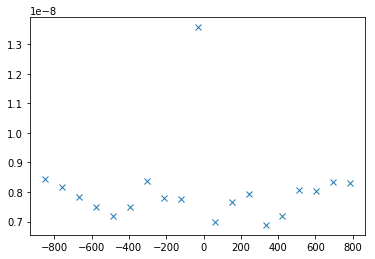

In [41]:
k_cols = (-M)/(P_3*(3*M*P_3+ 3*N_3**2 + 1))
plt.plot(P_3,k_cols,'x')
print k_cols
print k_cols.mean()
print np.average(k_cols,weights=P_3)

[  8.42145547e-09   8.18376355e-09   7.83288980e-09   7.48506871e-09
   7.17204481e-09   7.50291812e-09   8.36583303e-09   7.79362059e-09
   7.76446441e-09   1.35707603e-08   6.98860754e-09   7.64873177e-09
   7.93382241e-09   6.88628082e-09   7.18168310e-09   8.07424082e-09
   8.01916398e-09   8.33737851e-09   8.30329615e-09]
8.07715915089e-09
8.04466443597e-09


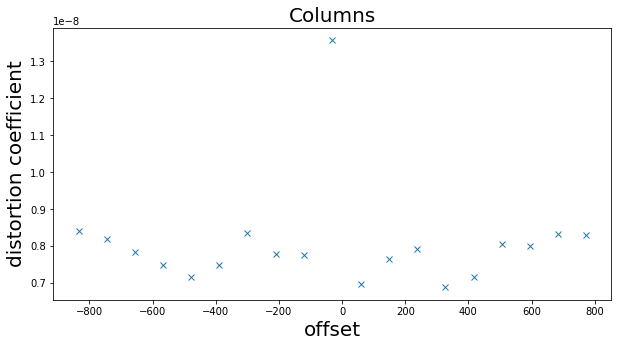

In [42]:
plt.figure(figsize=(10,5))
plt.ylabel('distortion coefficient',fontsize=20)
plt.xlabel('offset',fontsize=20)
plt.title('Columns',fontsize=20)
k_cols_4 = (-M_4)/(P_4*(3*M*P_4+ 3*N_4**2 + 1))
plt.plot(P_4,k_cols,'x')
print k_cols_4
print k_cols_4.mean()
print np.average(k_cols_4,weights=P_4)

In [43]:
K = np.array([k_lines.mean() ,k_cols.mean()])
print K.mean()
K = np.array([k_lines_4.mean() ,k_cols_4.mean()])
print K.mean()
K = np.array([np.average(k_lines, weights=np.abs(C_3)), np.average(k_cols, weights=np.abs(P_3))])
print K.mean()
K = np.array([np.average(k_lines_4, weights=np.abs(C_4)), np.average(k_cols_4, weights=np.abs(P_4))])
print K.mean()

8.00068832734e-09
8.12504534743e-09
8.05640847952e-09
8.18512245821e-09


In [44]:
print "the distortion coefficient is k =", K.mean()

the distortion coefficient is k = 8.18512245821e-09


In [45]:
k =K.mean()
# correcting for distortion
## loading all data points

X_d = coords_subpix[:,1] 
Y_d = coords_subpix[:,0] 

In [46]:
X_u = X_d + (X_d - x_d )*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))
Y_u = Y_d + (Y_d - y_d)*(k*((X_d-x_d)**2 + (Y_d-y_d)**2))

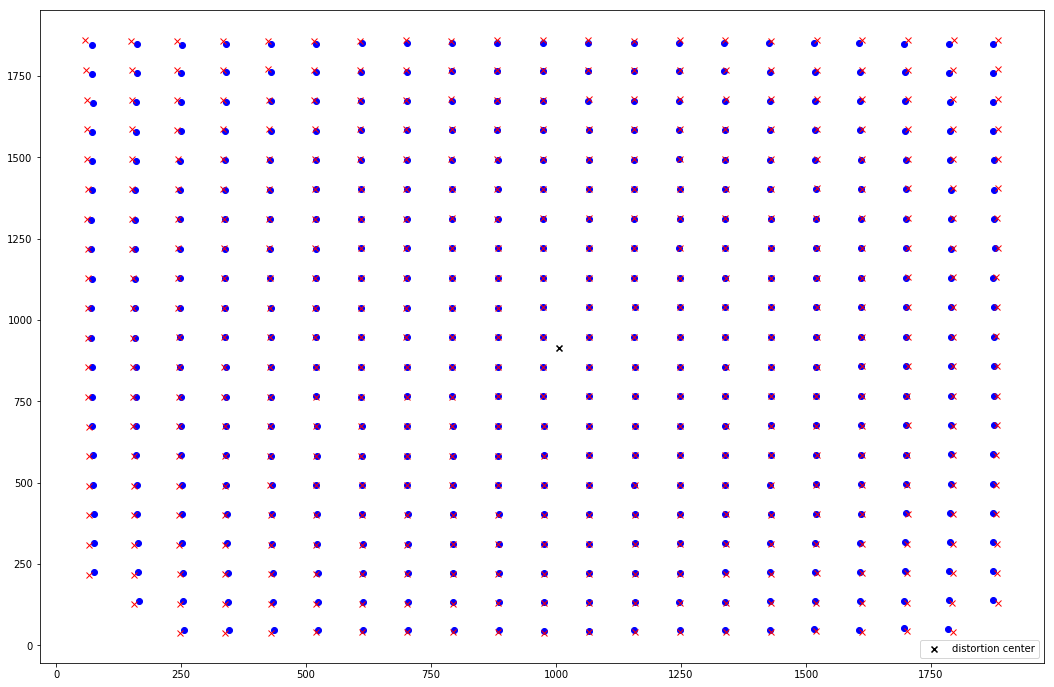

In [47]:
plt.clf()
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
#plt.scatter(xc,yc,marker='x',color='m',label='image center')
plt.scatter(x_d,y_d,marker='x',color='k',label='distortion center')
#plt.plot(lines[:,0], lines[:,1],'rx')
ax.plot(X_d, Y_d,'bo')
ax.plot(X_u,Y_u, 'rx')
#rec = plt.Rectangle((0,0), width=Nx,height=Ny, fill='False')
#ax.add_patch(rec)
plt.legend(loc='lower right')


In [48]:
plate_scale = 0.5
d_m_pixels = np.sqrt((1./len(X_u))*np.sum((X_u-X_d)**2+(Y_u-Y_d)**2))
d_m_arc = d_m_pixels*plate_scale
d_m_km = d_m_arc*725
print "the distortion is around:",'\n', d_m_pixels, 'pixels', '\n', d_m_arc, 'arcseconds', '\n',d_m_km, 'km'

the distortion is around: 
5.63823558136 pixels 
2.81911779068 arcseconds 
2043.86039824 km


In [49]:
# disortionpercent:
D=((np.sqrt((X_d-x_d)**2+(Y_d-y_d)**2) - np.sqrt((X_u-x_d)**2+(Y_u-y_d)**2))/np.sqrt((X_u-x_d)**2+(Y_u-y_d)**2))*100
print D.mean()
print np.abs(D).max()


-0.483082944665
1.4083448367


In [50]:
np.sqrt(((X_u-X_d)**2+(Y_u-Y_d)**2)).max()


18.870816072816201